# 十八.图像锐化与边缘检测之Scharr算子、Canny算子和LOG算子

由于收集图像数据的器件或传输数图像的通道的存在一些质量缺陷，文物图像时间久远，或者受一些其他外界因素、动态不稳定抓取图像的影响，使得图像存在模糊和有噪声的情况，从而影响到图像识别工作的开展。这时需要开展图像锐化和边缘检测处理，加强原图像的高频部分，锐化突出图像的边缘细节，改善图像的对比度，使模糊的图像变得更清晰。图像锐化和边缘提取技术可以消除图像中的噪声，提取图像信息中用来表征图像的一些变量，为图像识别提供基础。通常使用灰度差分法对图像的边缘、轮廓进行处理，将其凸显。前文分别采用Laplacian算子、Robert算子、Prewitt算子和Sobel算子进行图像锐化边缘处理实验，本文将继续讲解Scharr算子、Canny算子和LOG算子。

本节主要讲解灰度线性变换，基础性知识希望对您有所帮助。

1.Scharr算子

2.Canny算子

3.LOG算子

4.总结代码


由于Sobel算子在计算相对较小的核的时候，其近似计算导数的精度比较低，比如一个33的Sobel算子，当梯度角度接近水平或垂直方向时，其不精确性就越发明显。Scharr算子同Sobel算子的速度一样快，但是准确率更高，尤其是计算较小核的情景，所以利用33滤波器实现图像边缘提取更推荐使用Scharr算子。Scharr算子又称为Scharr滤波器，也是计算x或y方向上的图像差分，在OpenCV中主要是配合Sobel算子的运算而存在的，其滤波器的滤波系数如下：


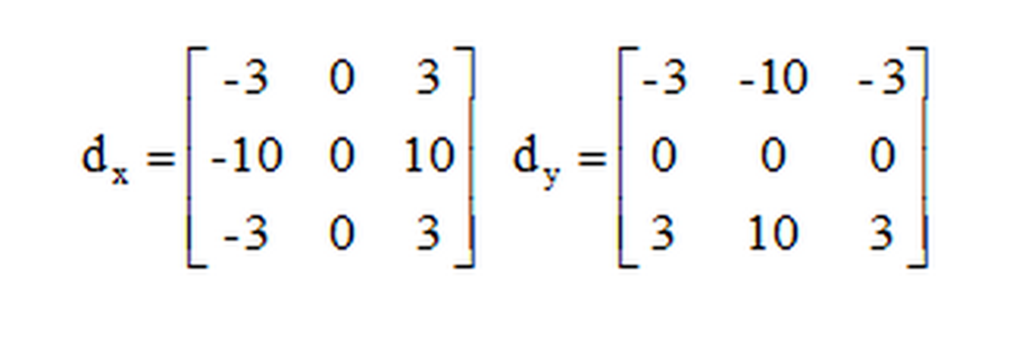

Scharr算子的函数原型如下所示，和Sobel算子几乎一致，只是没有ksize参数，其函数原型如下所示：dst = Scharr(src, ddepth, dx, dy[, dst[, scale[, delta[, borderType]]]]])src表示输入图像dst表示输出的边缘图，其大小和通道数与输入图像相同ddepth表示目标图像所需的深度，针对不同的输入图像，输出目标图像有不同的深度dx表示x方向上的差分阶数，取值1或 0dy表示y方向上的差分阶数，取值1或0scale表示缩放导数的比例常数，默认情况下没有伸缩系数delta表示将结果存入目标图像之前，添加到结果中的可选增量值borderType表示边框模式，更多详细信息查阅BorderTypesPython实现代码如下所示：


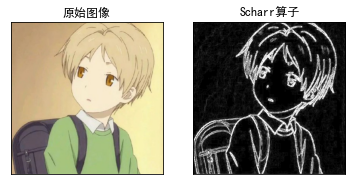

True

In [1]:
# -*- coding: utf-8 -*-
import cv2  
import numpy as np  
import matplotlib.pyplot as plt
 
#读取图像
img = cv2.imread('test.jpg')
lenna_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#灰度化处理图像
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
# Scharr算子
x = cv2.Scharr(grayImage, cv2.CV_32F, 1, 0) #X方向
y = cv2.Scharr(grayImage, cv2.CV_32F, 0, 1) #Y方向
absX = cv2.convertScaleAbs(x)       
absY = cv2.convertScaleAbs(y)
Scharr = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']

#显示图形
titles = [u'原始图像', u'Scharr算子']  
images = [lenna_img, Scharr]  
for i in range(2):  
   plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("heihei.jpg", images[1])



## 18.2.Canny算子

John F.Canny于1986年发明了一个多级边缘检测算法——Canny边缘检测算子，并创立了边缘检测计算理论（Computational theory of edge detection），该理论有效地解释了这项技术的工作理论。边缘检测通常是在保留原有图像属性的情况下，对图像数据规模进行缩减，提取图像边缘轮廓的处理方式。Canny算法是一种被广泛应用于边缘检测的标准算法，其目标是找到一个最优的边缘检测解或找寻一幅图像中灰度强度变化最强的位置。最优边缘检测主要通过低错误率、高定位性和最小响应三个标准进行评价。

Canny算子的实现步骤如下：

1.使用高斯平滑（如公式所示）去除噪声。


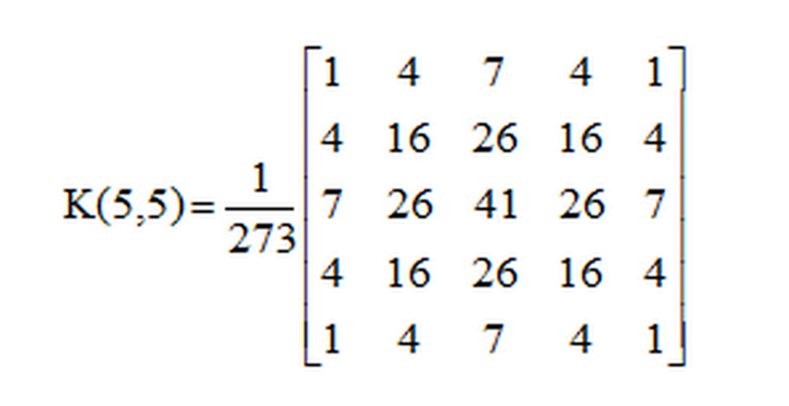

2.按照Sobel滤波器步骤计算梯度幅值和方向，寻找图像的强度梯度。先将卷积模板分别作用x和y方向，再计算梯度幅值和方向，其公式如下所示。梯度方向一般取0度、45度、90度和135度四个方向。


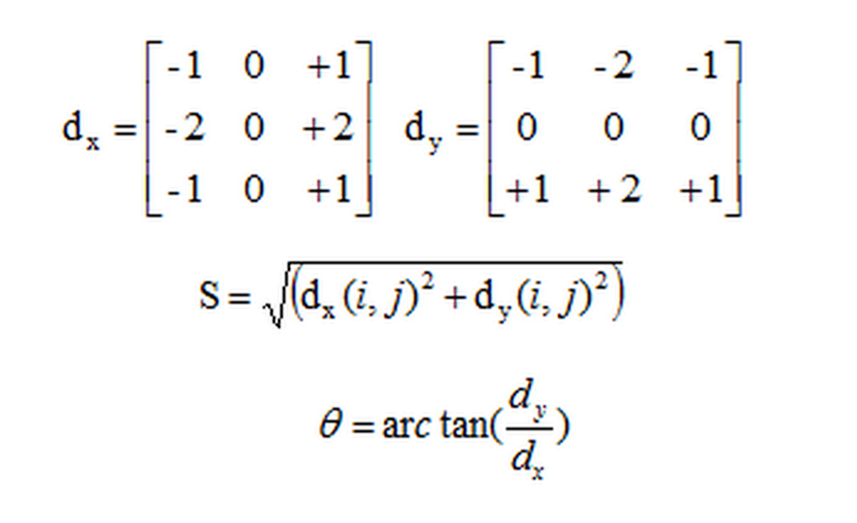

3.通过非极大值抑制（Non-maximum Suppression）过滤掉非边缘像素，将模糊的边界变得清晰。该过程保留了每个像素点上梯度强度的极大值，过滤掉其他的值。对于每个像素点，它进行如下操作：

1）将其梯度方向近似为以下值中的一个，包括0、45、90、135、180、225、270和315，即表示上下左右和45度方向。

2）比较该像素点和其梯度正负方向的像素点的梯度强度，如果该像素点梯度强度最大则保留，否则抑制（删除，即置为0）。其处理后效果如下图所示，左边表示梯度值，右边表示非极大值抑制处理后的边缘。


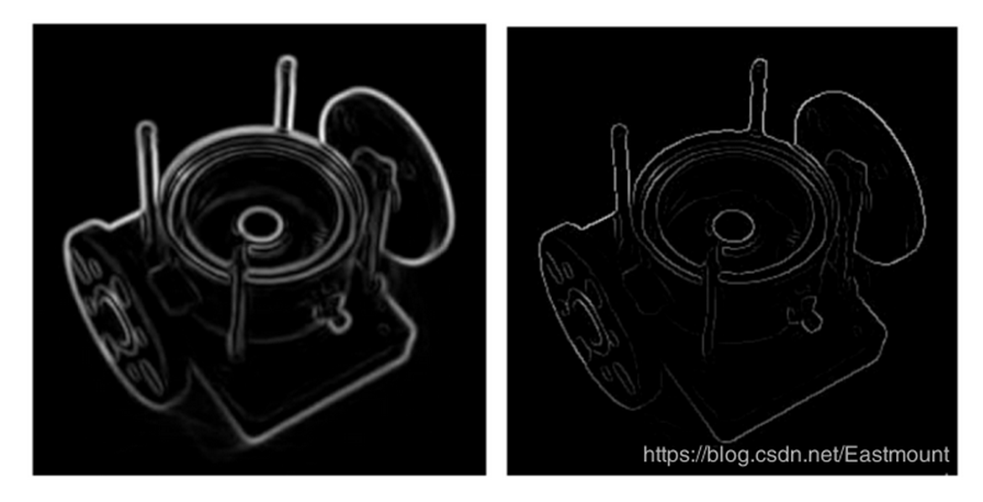

4.利用双阈值方法来确定潜在的边界。经过非极大抑制后图像中仍然有很多噪声点，此时需要通过双阈值技术处理，即设定一个阈值上界和阈值下界。图像中的像素点如果大于阈值上界则认为必然是边界（称为强边界，strong edge），小于阈值下界则认为必然不是边界，两者之间的则认为是候选项（称为弱边界，weak edge）。经过双阈值处理的图像如下图所示，左边为非极大值抑制处理后的边缘，右边为双阈值技术处理的效果图。



5.利用滞后技术来跟踪边界。若某一像素位置和强边界相连的弱边界认为是边界，其他的弱边界则被删除。在OpenCV中，Canny()函数原型如下所示：

edges = Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]])

image表示输入图像edges表示输出的边缘图，其大小和类型与输入图像相同threshold1表示第一个滞后性阈值threshold2表示第二个滞后性阈值apertureSize表示应用Sobel算子的孔径大小，其默认值为3L2gradient表示一个计算图像梯度幅值的标识，默认值为falseCanny算子的边缘提取实现代码如下所示：


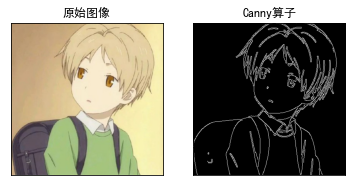

In [13]:
# -*- coding: utf-8 -*-
import cv2  
import numpy as np  
import matplotlib.pyplot as plt
 
#读取图像
img = cv2.imread('test.jpg')
lenna_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#灰度化处理图像
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#高斯滤波降噪
gaussian = cv2.GaussianBlur(grayImage, (3,3), 0)
 
#Canny算子
Canny = cv2.Canny(gaussian, 50, 150) 

#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']

#显示图形
titles = [u'原始图像', u'Canny算子']  
images = [lenna_img, Canny]  
for i in range(2):  
   plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()




## 18.3.LOG算子

LOG（Laplacian of Gaussian）边缘检测算子是David Courtnay Marr和Ellen Hildreth在1980年共同提出的，也称为Marr & Hildreth算子，它根据图像的信噪比来求检测边缘的最优滤波器。该算法首先对图像做高斯滤波，然后再求其拉普拉斯（Laplacian）二阶导数，根据二阶导数的过零点来检测图像的边界，即通过检测滤波结果的零交叉（Zero crossings）来获得图像或物体的边缘。LOG算子该综合考虑了对噪声的抑制和对边缘的检测两个方面，并且把Gauss平滑滤波器和Laplacian锐化滤波器结合了起来，先平滑掉噪声，再进行边缘检测，所以效果会更好。 该算子与视觉生理中的数学模型相似，因此在图像处理领域中得到了广泛的应用。它具有抗干扰能力强，边界定位精度高，边缘连续性好，能有效提取对比度弱的边界等特点。常见的LOG算子是5*5模板，如下所示：


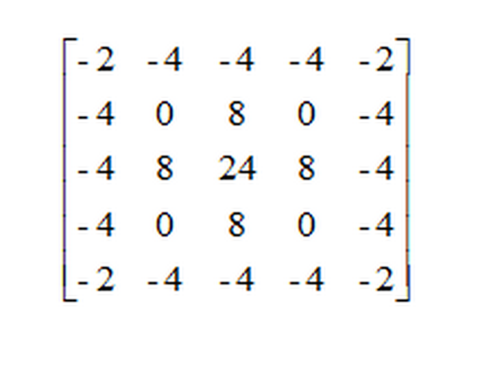


由于LOG算子到中心的距离与位置加权系数的关系曲线像墨西哥草帽的剖面，所以LOG算子也叫墨西哥草帽滤波器，如图所示。


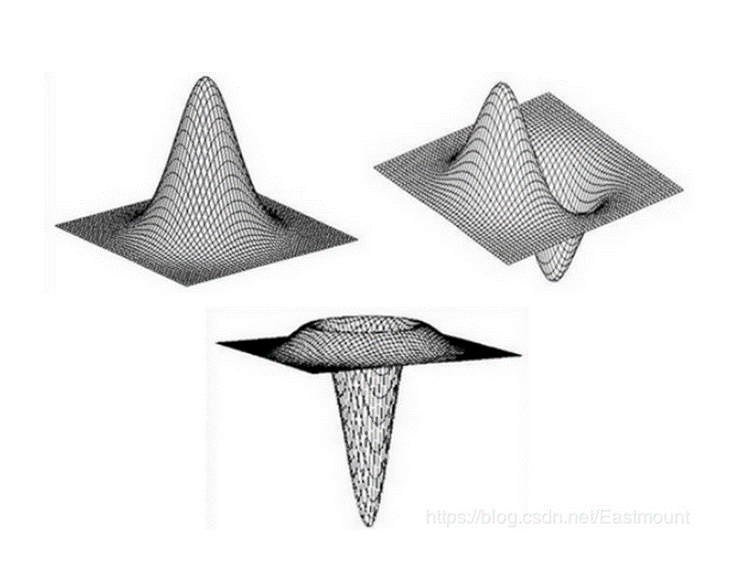

LOG算子的边缘提取实现代码如下所示：


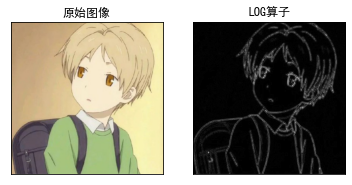

In [2]:
# -*- coding: utf-8 -*-
import cv2  
import numpy as np  
import matplotlib.pyplot as plt
 
#读取图像
img = cv2.imread('test.jpg')
lenna_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#灰度化处理图像
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#先通过高斯滤波降噪
gaussian = cv2.GaussianBlur(grayImage, (3,3), 0)
 
#再通过拉普拉斯算子做边缘检测
dst = cv2.Laplacian(gaussian, cv2.CV_16S, ksize = 3)
LOG = cv2.convertScaleAbs(dst)

#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']

#显示图形
titles = [u'原始图像', u'LOG算子']  
images = [lenna_img, LOG]  
for i in range(2):  
   plt.subplot(1,2,i+1), plt.imshow(images[i], 'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()



## 18.4.总结代码

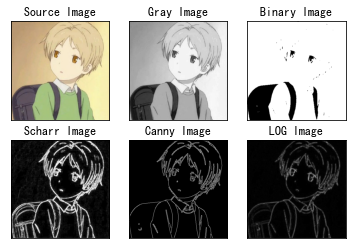

In [20]:
# -*- coding: utf-8 -*-
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取图像
img = cv2.imread('test.jpg')
lenna_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#灰度化处理图像
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#高斯滤波
gaussianBlur = cv2.GaussianBlur(grayImage, (3,3), 0)

#阈值处理
ret, binary = cv2.threshold(gaussianBlur, 127, 255, cv2.THRESH_BINARY)

#Scharr算子
x = cv2.Scharr(grayImage, cv2.CV_32F, 1, 0) #X方向
y = cv2.Scharr(grayImage, cv2.CV_32F, 0, 1) #Y方向
absX = cv2.convertScaleAbs(x)       
absY = cv2.convertScaleAbs(y)
Scharr = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

#Canny算子
gaussian = cv2.GaussianBlur(grayImage, (3,3), 0) #高斯滤波降噪
Canny = cv2.Canny(gaussian, 50, 150) 

#LOG算子
gaussian = cv2.GaussianBlur(grayImage, (3,3), 0) #先通过高斯滤波降噪
dst = cv2.Laplacian(gaussian, cv2.CV_16S, ksize = 3) #再通过拉普拉斯算子做边缘检测
LOG = cv2.convertScaleAbs(dst)

#效果图
titles = ['Source Image', 'Gray Image', 'Binary Image',
          'Scharr Image','Canny Image', 'LOG Image']  
images = [lenna_img, grayImage, binary, Scharr, Canny, LOG]  
for i in np.arange(6):  
   plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show() 
